In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.insert(1, './lib/')

# {Project Title} - Progress Report
### Team Diatonics | CS 418 | Spring 2020

### Team Members
* Leopoldo Gomez (`lgomez36@uic.edu`, `pologomez`)
* Matthew Searcy (`msearc2@uic.edu`, `MatthewSearcy`)
* Matt Rusnaczyk (`mrusna4@uic.edu`, `mrusnaczyk`)
* Faraz Shakir (`fshaki3@uic.edu`, `FShakir`)
* Mahdi Moghaddam (`mmogha2@uic.edu`, `mahdimo5595`)

------

## Changes to Scope of Project
### `TODO`

---

## Data Acquisition and Cleaning
Our analysis is based on two sets of data. The first is the [Classic Rock Song List from FiveThirtyEight](https://github.com/fivethirtyeight/data/blob/master/classic-rock/classic-rock-song-list.csv); the second is the audio features data made available by Spotify through their [RESTful API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

First, we read in the data from the classic rock songs dataset, then we transform the data into a list consisting of each track and artist concatenated into one string. Converting into this format allows us to more easily search for the tracks in Spotify later on.

In [2]:
# the CSV file containing titles and artists/bands
songs = pd.read_csv("data/classic-rock-song-list.csv")

# extracting title and names of the artists/bands
titles = songs['Song Clean'].tolist()
artists = songs['ARTIST CLEAN'].tolist()

# creating a list of titles+aritsts to be queried
title_artist = []
for i in range(0, len(titles)):
    title_artist.append(titles[i] + " " + artists[i])

Next, we take the title/artist strings we generated earlier, and retrieve the corresponding Spotify resource URLs for each:

In [3]:
import spotify

spotify_client = spotify.get_spotify_client()

# getting the urls of each song
urls = spotify.get_spotify_resource_url(title_artist, spotify_client)

retrying after...4secs
retrying after...4secs
retrying after...1secs
retrying after...3secs
retrying after...2secs
retrying after...4secs
retrying after...2secs
retrying after...4secs
retrying after...4secs
retrying after...1secs
retrying after...2secs
retrying after...1secs
retrying after...1secs
retrying after...2secs
retrying after...3secs
retrying after...4secs


Then, we use the Spotify API to retrieve the audio features for each of the songs in the list, and add the track name and artist back in:

In [4]:
# gets the audio features of each song
dataframe = spotify.audio_features(urls, spotify_client)
dataframe['artist'] = songs['ARTIST CLEAN']
dataframe['title'] = songs['Song Clean']
dataframe['year'] = songs['Release Year']

And this is the resulting dataset:

In [5]:
dataframe.head()

danceability  energy  key  loudness  speechiness  acousticness  \
0         0.425   0.681    1    -8.604       0.0316       0.02290   
1         0.418   0.775    4    -9.591       0.0333       0.05310   
2         0.567   0.559    9   -10.175       0.0288       0.00888   
3         0.659   0.505    0   -12.773       0.0302       0.05300   
4         0.646   0.426    0   -10.629       0.0480       0.08580   

   instrumentalness  liveness  valence    tempo  duration_ms       artist  \
0          0.000219    0.0543    0.933  131.011       279333  .38 Special   
1          0.001250    0.0932    0.845  123.524       247267  .38 Special   
2          0.001310    0.0764    0.898  127.227       280636  .38 Special   
3          0.000000    0.0544    0.879  128.295       241227  .38 Special   
4          0.072700    0.0746    0.462  124.794       359507         10cc   

                    title  year  
0        Caught Up in You  1982  
1            Fantasy Girl   NaN  
2         Hold On Loosely  1981  
3  Rockin' Into the Night  1980  
4       Art For Arts Sake  1975

---

## Exploratory Data Analysis

### `TODO`


In [6]:
eda_data = dataframe.copy().dropna()
try:
    eda_data = eda_data.drop(columns=['cluster', 'tempo'])
except:
    None

eda_data.describe()

danceability       energy          key     loudness  speechiness  \
count   1618.000000  1618.000000  1618.000000  1618.000000  1618.000000   
mean       0.522561     0.682834     5.059333    -9.051781     0.052997   
std        0.140676     0.194402     3.503184     3.333427     0.040323   
min        0.000000     0.012400     0.000000   -23.340000     0.000000   
25%        0.428000     0.547250     2.000000   -11.310750     0.032700   
50%        0.527000     0.705500     5.000000    -8.853500     0.040300   
75%        0.620000     0.841750     9.000000    -6.454000     0.056575   
max        0.934000     0.995000    11.000000    -2.100000     0.405000   

       acousticness  instrumentalness     liveness      valence        tempo  \
count   1618.000000       1618.000000  1618.000000  1618.000000  1618.000000   
mean       0.188043          0.068006     0.206166     0.599592   124.717326   
std        0.222899          0.184922     0.188705     0.229609    27.141844   
min        0.000005          0.000000     0.012000     0.000000     0.000000   
25%        0.016300          0.000006     0.086450     0.429000   105.915500   
50%        0.095700          0.000472     0.131000     0.605500   124.321500   
75%        0.294000          0.015575     0.269750     0.788000   140.107000   
max        0.971000          0.941000     0.992000     0.990000   208.282000   

        duration_ms  
count  1.618000e+03  
mean   2.615791e+05  
std    8.843748e+04  
min    9.752000e+03  
25%    2.079130e+05  
50%    2.485830e+05  
75%    2.983198e+05  
max    1.360027e+06

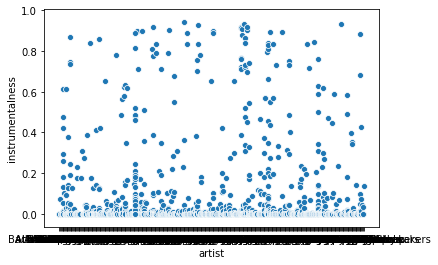

In [7]:
plot = sns.scatterplot(data=eda_data, x='artist', y='instrumentalness')

[Text(0, 0, 'danceability'),
 Text(0, 0, 'energy'),
 Text(0, 0, 'speechiness'),
 Text(0, 0, 'acousticness'),
 Text(0, 0, 'instrumentalness'),
 Text(0, 0, 'liveness'),
 Text(0, 0, 'valence')]

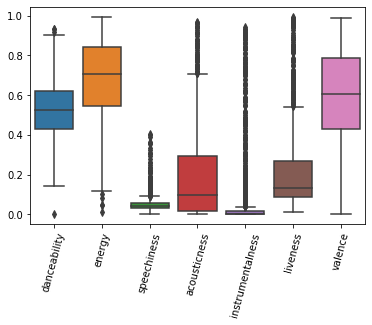

In [8]:
plot = sns.boxplot(data=eda_data.drop(columns=['duration_ms', 'tempo', 'loudness', 'key']))
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

Text(0.5, 1.0, 'Distribution of Acousticness Values')

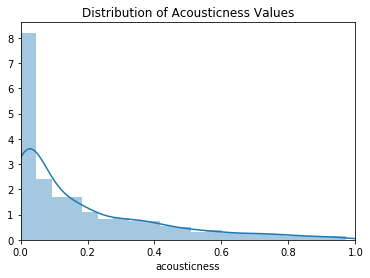

In [9]:
acousticness_data = eda_data.loc[:, 'acousticness']

plot = sns.distplot(acousticness_data)
plot.set(xlim=(0, 1.0))
plot.set_title('Distribution of Acousticness Values')

---
## Machine Learning Analysis
### `TODO`

In [10]:
# scalling loudness key and tempo so the values of all features are between 0 and 1

scaler = MinMaxScaler()

scaler.fit(dataframe[['loudness']])
dataframe[['loudness']] = scaler.transform(dataframe[['loudness']])

scaler.fit(dataframe[['key']])
dataframe[['key']] = scaler.transform(dataframe[['key']])

scaler.fit(dataframe[['tempo']])
dataframe[['tempo']] = scaler.transform(dataframe[['tempo']])

In [11]:
dataframe.head()

danceability  energy       key  loudness  speechiness  acousticness  \
0         0.425   0.681  0.090909  0.675499       0.0316       0.02290   
1         0.418   0.775  0.363636  0.630254       0.0333       0.05310   
2         0.567   0.559  0.818182  0.603484       0.0288       0.00888   
3         0.659   0.505  0.000000  0.484391       0.0302       0.05300   
4         0.646   0.426  0.000000  0.582672       0.0480       0.08580   

   instrumentalness  liveness  valence     tempo  duration_ms       artist  \
0          0.000219    0.0543    0.933  0.606763       279333  .38 Special   
1          0.001250    0.0932    0.845  0.572088       247267  .38 Special   
2          0.001310    0.0764    0.898  0.589238       280636  .38 Special   
3          0.000000    0.0544    0.879  0.594184       241227  .38 Special   
4          0.072700    0.0746    0.462  0.577969       359507         10cc   

                    title  year  
0        Caught Up in You  1982  
1            Fantasy Girl   NaN  
2         Hold On Loosely  1981  
3  Rockin' Into the Night  1980  
4       Art For Arts Sake  1975

In [12]:
# k-means clustering algorithm with 50 clusters

km = KMeans(n_clusters=50)
prediction = km.fit_predict(dataframe[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
                                      'instrumentalness', 'liveness', 'valence', 'tempo']])
dataframe['cluster'] = prediction

In [13]:
dataframe.head()

danceability  energy       key  loudness  speechiness  acousticness  \
0         0.425   0.681  0.090909  0.675499       0.0316       0.02290   
1         0.418   0.775  0.363636  0.630254       0.0333       0.05310   
2         0.567   0.559  0.818182  0.603484       0.0288       0.00888   
3         0.659   0.505  0.000000  0.484391       0.0302       0.05300   
4         0.646   0.426  0.000000  0.582672       0.0480       0.08580   

   instrumentalness  liveness  valence     tempo  duration_ms       artist  \
0          0.000219    0.0543    0.933  0.606763       279333  .38 Special   
1          0.001250    0.0932    0.845  0.572088       247267  .38 Special   
2          0.001310    0.0764    0.898  0.589238       280636  .38 Special   
3          0.000000    0.0544    0.879  0.594184       241227  .38 Special   
4          0.072700    0.0746    0.462  0.577969       359507         10cc   

                    title  year  cluster  
0        Caught Up in You  1982       15  
1            Fantasy Girl   NaN        6  
2         Hold On Loosely  1981       26  
3  Rockin' Into the Night  1980       15  
4       Art For Arts Sake  1975        0

In [14]:
# returns a dataframe of songs similar a spicific song in dataframe

def recommend(song, dataframe):
    try:
        clt = dataframe[dataframe.title == song].cluster.values[0]
        df = dataframe[dataframe.cluster == clt][['title', 'artist']].reset_index().drop(columns=['index'])
        return df
    except:
        print('The requested song is not in dataframe.')

In [15]:
recommend('Back In Black', dataframe).head()

title         artist
0  Back In Black          AC/DC
1  Come Together      Aerosmith
2        Elected   Alice Cooper
3  Shooting Star    Bad Company
4     Sweet Leaf  Black Sabbath

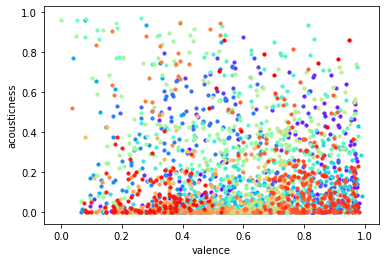

In [16]:
plt.xlabel('valence')
plt.ylabel('acousticness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.valence, df.acousticness, color=colors[j], s=10)

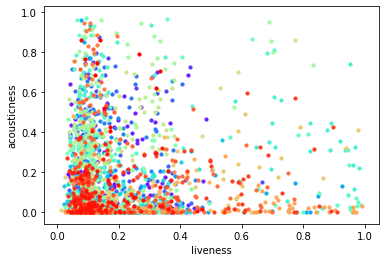

In [17]:
plt.xlabel('liveness')
plt.ylabel('acousticness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.liveness, df.acousticness, color=colors[j], s=10)

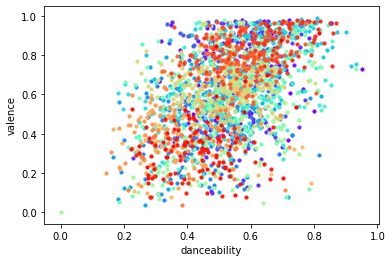

In [18]:
plt.xlabel('danceability')
plt.ylabel('valence')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.danceability, df.valence, color=colors[j], s=10)

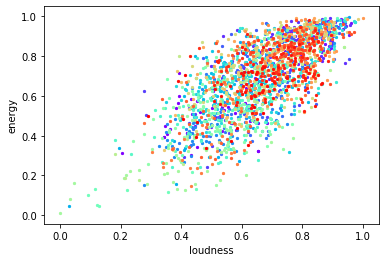

In [19]:
plt.xlabel('loudness')
plt.ylabel('energy')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.loudness, df.energy, color=colors[j], s=5)

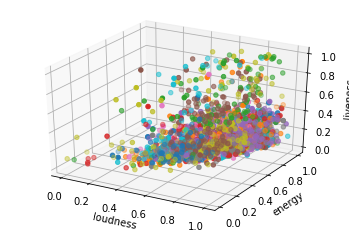

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.loudness, df.energy, df.liveness )


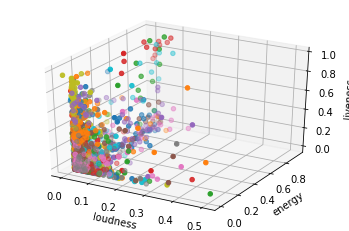

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.speechiness, df.instrumentalness, df.acousticness)

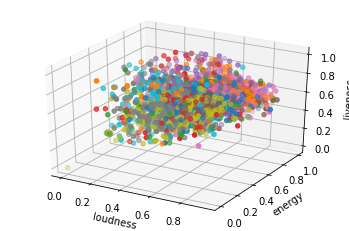

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.danceability, df.valence, df.tempo)

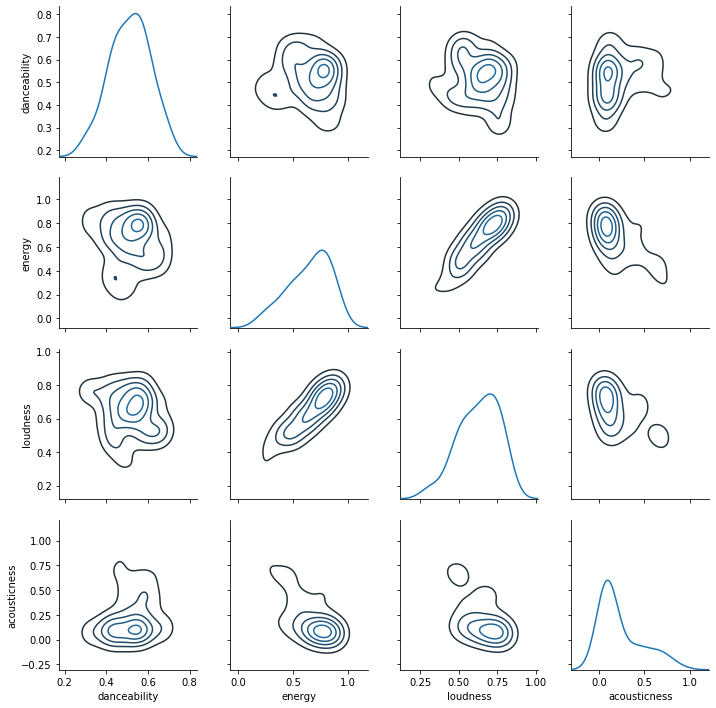

In [50]:
#, 'valence', 'tempo', 'liveness', 'speechiness', 'acousticness']]

sm_df = dataframe.where(dataframe['cluster'] < 100)\
                 .groupby(by='cluster')\
                 .mean().dropna()\
                 .loc[:, ['danceability', 'energy', 'loudness', 'acousticness']]
# pt = pivot_table(dataframe, values=)

# plot = sns.scatterplot(x='energy', y='loudness', data=sm_df, hue='cluster', 
    # legend='full', palette='viridis')
# sns.heatmap(data=sm_df, vmin=0.0, vmax=1.0)
# sm_df.head(20)
g = sns.PairGrid(sm_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

---

## Reflection

For reference
- What is hardest part of the project that you’ve encountered so far?
- What are your initial insights?
- Are there any concrete results you can show at this point? If not, why not?
- Going forward, what are the current biggest problems you’re facing?

### `TODO`

---